<h1><center>Insurance Claims Fraud Detection</center></h1>

## Business Problem

An insurance company has approached you with a dataset of previous claims of their clients. The insurance company wants you to develop a model to help them predict which claims look fraudulent. By doing so you hope to save the company millions of dollars annually.

In [30]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the dataset into a dataframe
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
#Check the shape of the dataframe
df.shape

(1000, 39)

In [4]:
#Check the columns of the dataframe
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
#check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [6]:
objectcols = [col for col in df.columns if df[col].dtype == object]
objectcols

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [7]:
feats = ['policy_state','insured_sex', 'insured_education_level','insured_occupation','insured_hobbies','insured_relationship',\
         'collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location',\
         'property_damage','police_report_available','auto_make','auto_model','fraud_reported','incident_type']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)
df_final.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,328,48,521585,2014-10-17,250/500,1000,1406.91,0,466132,53300,...,0,0,0,0,0,0,1,0,1,0
1,228,42,342868,2006-06-27,250/500,2000,1197.22,5000000,468176,0,...,0,0,0,0,0,0,1,0,0,1
2,134,29,687698,2000-09-06,100/300,2000,1413.14,5000000,430632,35100,...,0,0,0,0,0,0,0,0,0,0
3,256,41,227811,1990-05-25,250/500,2000,1415.74,6000000,608117,48900,...,0,1,0,0,0,0,1,0,1,0
4,228,44,367455,2014-06-06,500/1000,1000,1583.91,6000000,610706,66000,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#We use sklearn’s train_test_split to split the data into a training set and a test set.
from sklearn.model_selection import train_test_split

X = df_final.drop(['fraud_reported_Y','policy_csl','policy_bind_date','incident_date'],axis=1).values
y = df_final['fraud_reported_Y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Due to the massive amounts of computations taking place in deep learning, feature scaling is compulsory. Feature scaling standardizes the range of our independent variables.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 1143)
(300, 1143)
(700,)
(300,)


In [36]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(15,0.9,'15')

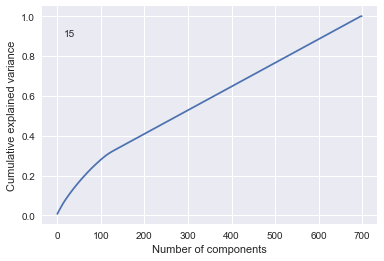

In [37]:
# apply PCA on X_train
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy=(15, .90))

In [ ]:
# individual explained variance
plt.figure(figsize=(10, 5))

plt.bar(range(44), pca.explained_variance_, alpha=0.5,
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

In [12]:
#import keras and its modules
import keras
from keras.models import Sequential #Sequential module is required to initialize ANN
from keras.layers import Dense #Dense module is required to build the layers of ANN

Using TensorFlow backend.


Next we need to initialize our ANN by creating an instance of Sequential. The Sequential function initializes a linear stack of layers. This allows us to add more layers later using the Dense module.

In [13]:
classifier = Sequential()

<b>Adding input layer (First Hidden Layer)</b>

We use the add method to add different layers to our ANN. The first parameter is the number of nodes you want to add to this layer. There is no rule of thumb as to how many nodes you should add. However a common strategy is to choose the number of nodes as the average of nodes in the input layer and the number of nodes in the output layer.

Say for example you had five independent variables and one output. Then you would take the sum of that and divide by two, which is three. You can also decide to experiment with a technique called parameter tuning. The second parameter, kernel_initializer, is the function that will be used to initialize the weights. In this case, it will use a uniform distribution to make sure that the weights are small numbers close to zero. The next parameter is the activation function. We use the Rectifier function, shortened as relu. We mostly use this function for the hidden layer in ANN. The final parameter is input_dim, which is the number of nodes in the input layer. It represents the number of independent variables.

In [19]:
classifier.add(
        Dense(500, kernel_initializer = 'uniform',
              activation = 'relu', input_dim=1143))

<b>Adding Second Hidden Layer</b>

Adding the second hidden layer is similar to adding the first hidden layer. 

We don’t need to specify the input_dim parameter because we have already specified it in the first hidden layer. In the first hidden layer we specified this in order to let the layer know how many input nodes to expect. In the second hidden layer the ANN already knows how many input nodes to expect so we don’t need to repeat ourselves.

In [20]:
classifier.add(
        Dense(500, kernel_initializer = 'uniform',
              activation = 'relu'))

<b>Adding the Output layer</b>

We change the first parameter because in our output node we expect one node. This is because we are only interested in knowing whether a claim was fraudulent or not. We change the activation function because we want to get the probabilities that a claim is fraudulent. We do this by using the Sigmoid activation function. In case you’re dealing with a classification problem that has more than two classes (i.e. classifying cats, dogs, and monkeys) we’d need to change two things. We ‘d change the first parameter to 3 and change the activation function to softmax. Softmax is a sigmoid function applied to an independent variable with more than two categories.

In [21]:
classifier.add(
     Dense(1, kernel_initializer = 'uniform',
           activation = 'sigmoid'))

<b>Compiling the ANN</b>

Compiling is basically applying a stochastic gradient descent to the whole neural network. The first parameter is the algorithm you want to use to get the optimal set of weights in the neural network. The algorithm used here is a stochastic gradient algorithm. There are many variants of this. A very efficient one to use is adam. The second parameter is the loss function within the stochastic gradient algorithm. Since our categories are binary we use the binary_crossentropy loss function. Otherwise we would have used categorical_crossentopy. The final argument is the criterion we’ll use to evaluate our model. In this case we use the accuracy.

In [22]:
classifier.compile(optimizer= 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

<b>Fitting ANN to the training set</b>

X_train represents the independent variables we’re using to train our ANN, and y_train represents the column we’re predicting. Epochs represents the number of times we’re going to pass our full dataset through the ANN. Batch_size is the number of observations after which the weights will be updated.

In [23]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=2, validation_data = [X_test, y_test])

Train on 700 samples, validate on 300 samples
Epoch 1/100
 - 1s - loss: 0.4529 - acc: 0.9000 - val_loss: 0.9810 - val_acc: 0.7500
Epoch 2/100
 - 0s - loss: 0.2182 - acc: 0.8943 - val_loss: 1.2885 - val_acc: 0.7500
Epoch 3/100
 - 1s - loss: 0.2072 - acc: 0.9043 - val_loss: 1.3996 - val_acc: 0.7500
Epoch 4/100
 - 0s - loss: 0.2092 - acc: 0.9043 - val_loss: 1.6714 - val_acc: 0.7500
Epoch 5/100
 - 0s - loss: 0.2065 - acc: 0.9043 - val_loss: 1.7416 - val_acc: 0.7500
Epoch 6/100
 - 0s - loss: 0.2041 - acc: 0.9043 - val_loss: 1.7789 - val_acc: 0.7500
Epoch 7/100
 - 0s - loss: 0.2045 - acc: 0.9043 - val_loss: 1.9077 - val_acc: 0.7500
Epoch 8/100
 - 1s - loss: 0.2038 - acc: 0.9043 - val_loss: 1.8930 - val_acc: 0.7500
Epoch 9/100
 - 0s - loss: 0.2061 - acc: 0.9043 - val_loss: 1.9429 - val_acc: 0.7500
Epoch 10/100
 - 0s - loss: 0.2057 - acc: 0.9043 - val_loss: 1.9925 - val_acc: 0.7500
Epoch 11/100
 - 0s - loss: 0.2035 - acc: 0.9043 - val_loss: 1.9778 - val_acc: 0.7500
Epoch 12/100
 - 0s - loss: 0

<b>Predicting using the training set</b>

In [24]:
y_pred = classifier.predict(X_test)
y_pred[0:10]

array([[  9.79284209e-07],
       [  9.70875135e-07],
       [  9.70475185e-07],
       [  9.70506676e-07],
       [  9.70475185e-07],
       [  9.70530778e-07],
       [  9.70475185e-07],
       [  9.70475185e-07],
       [  9.73435817e-07],
       [  9.70475185e-07]], dtype=float32)

In [25]:
y_pred = (y_pred > 0.5)
y_pred[0:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]], dtype=bool)

<b>Checking the confusion matrix</b>

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[225,   0],
       [ 75,   0]], dtype=int64)